In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import LsiModel
from scipy.sparse import csr_matrix
import joblib

# # # Contoh penggunaan
data = pd.read_csv('Data_Pemilu.csv')
num_topics = 10  # Jumlah topik yang diinginkan
top_n_words = 5  # Jumlah kata kunci untuk setiap topik

vectorizer = TfidfVectorizer(min_df=1,
                             norm='l2',
                             smooth_idf=True,
                             use_idf=True)

# Mengubah teks menjadi representasi vektor
X = vectorizer.fit_transform(data['content_clean'])

# Membuat sparse matrix menjadi format CSR
X_csr = csr_matrix(X)

# Membuat list dokumen Gensim corpus
corpus = []
for doc in X_csr:
    doc = [(idx, val) for idx, val in zip(doc.indices, doc.data)]
    corpus.append(doc)

# Membuat dictionary
id2word = {idx: word for idx, word in enumerate(vectorizer.get_feature_names_out())}

# Membuat model LSA dengan gensim
lsa_model = LsiModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

# Simpan model dan vectorizer menggunakan joblib
joblib.dump((vectorizer, lsa_model), 'lsa_tfidf_model_10topik.pkl')

['lsa_tfidf_model_10topik.pkl']

Topik 1: 0.264*"gibran" + 0.256*"prabowo" + 0.192*"ganjar" + 0.177*"cawapres" + 0.169*"presiden" + 0.156*"partai" + 0.151*"debat" + 0.150*"mahfud" + 0.142*"anies" + 0.140*"capres"
Topik 2: -0.415*"mk" + -0.276*"putusan" + -0.243*"hakim" + -0.213*"mkmk" + -0.212*"konstitusi" + -0.206*"anwar" + 0.163*"prabowo" + -0.163*"kpk" + -0.146*"usman" + -0.145*"usia"
Topik 3: 0.461*"kpk" + 0.347*"firli" + -0.221*"mk" + 0.176*"tersangka" + 0.174*"syahrul" + -0.151*"gibran" + 0.145*"syl" + 0.145*"korupsi" + 0.138*"bahuri" + -0.138*"putusan"
Topik 4: 0.466*"debat" + -0.286*"prabowo" + -0.273*"gibran" + 0.220*"kpu" + 0.217*"anies" + -0.196*"partai" + -0.176*"jokowi" + 0.166*"imin" + 0.155*"cak" + 0.153*"mahfud"
Topik 5: 0.468*"debat" + -0.393*"ganjar" + 0.344*"gibran" + -0.251*"mahfud" + 0.192*"prabowo" + 0.153*"cawapres" + 0.137*"kpu" + -0.133*"anies" + -0.121*"survei" + 0.116*"kpk"
Topik 6: 0.414*"anies" + -0.397*"ganjar" + -0.327*"mahfud" + 0.310*"imin" + 0.294*"cak" + -0.212*"debat" + 0.134*"muhai

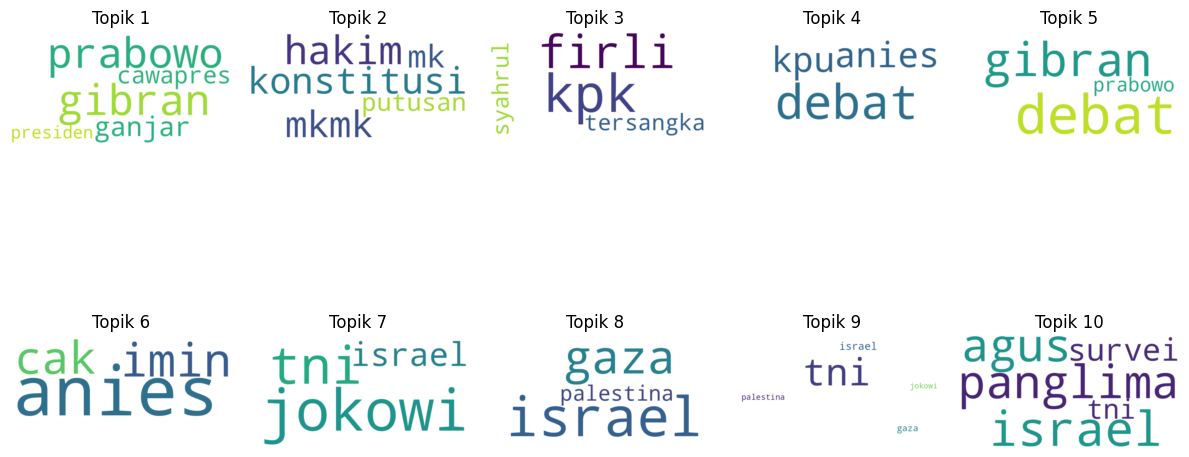

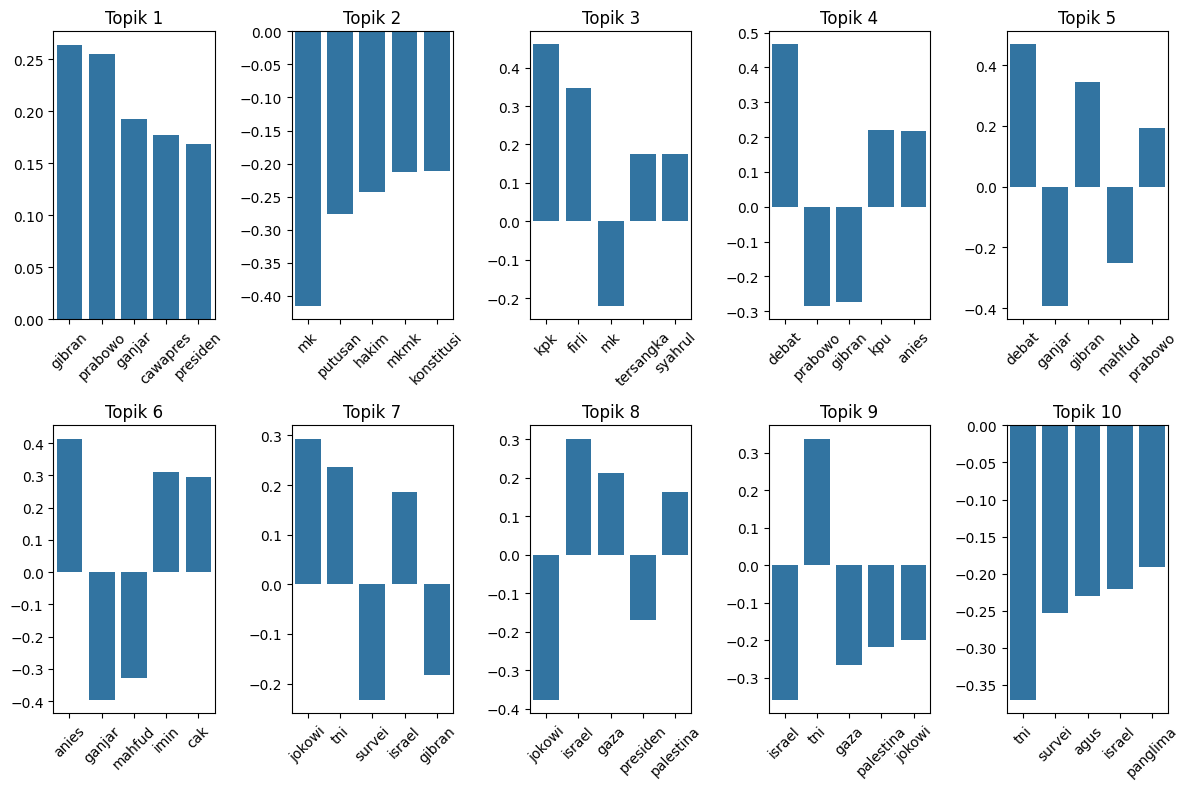

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy.sparse import csr_matrix

# Memuat kembali model dan vectorizer
vectorizer, lda_model = joblib.load('lsa_tfidf_model_10topik.pkl')

# Contoh penggunaan
data = pd.read_csv('Data_Pemilu.csv')
num_topics = 10  # Jumlah topik yang diinginkan
top_n_words = 5  # Jumlah kata kunci untuk setiap topik

# Mendapatkan kata-kata kunci untuk setiap topik
for idx, topic in lda_model.print_topics():
    print(f"Topik {idx + 1}: {topic}")

plt.figure(figsize=(12, 8))
for i in range(num_topics):
    plt.subplot(2, 5, i+1)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(lda_model.show_topic(i, topn=top_n_words)))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topik {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i in range(num_topics):
    plt.subplot(2, 5, i+1)
    topic_words = [word for word, _ in lda_model.show_topic(i, topn=top_n_words)]
    word_probs = [prob for _, prob in lda_model.show_topic(i, topn=top_n_words)]
    sns.barplot(x=topic_words, y=word_probs)
    plt.title(f'Topik {i+1}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
